In [2]:
#!pip install git+https://github.com/facebookresearch/segment-anything.git
#!pip install supervision opencv-python matplotlib


In [3]:
from segment_anything import SamPredictor, sam_model_registry



In [7]:
#!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -O sam_vit_h.pth


In [5]:
import cv2, numpy as np
from PIL import Image
import supervision as sv


In [8]:

# Cargar imagen
image = cv2.imread("car.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Cargar modelo
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h.pth").to("cuda")
predictor = SamPredictor(sam)
predictor.set_image(image)

In [9]:
input_point = np.array([[300, 300]])  # punto en la imagen
input_label = np.array([1])
masks, scores, _ = predictor.predict(point_coords=input_point, point_labels=input_label, multimask_output=True)


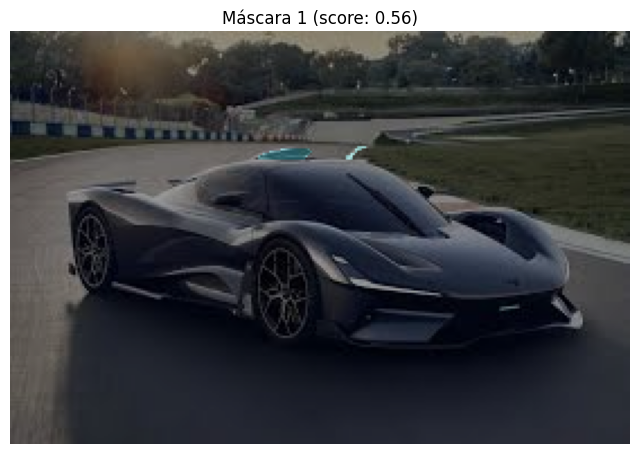

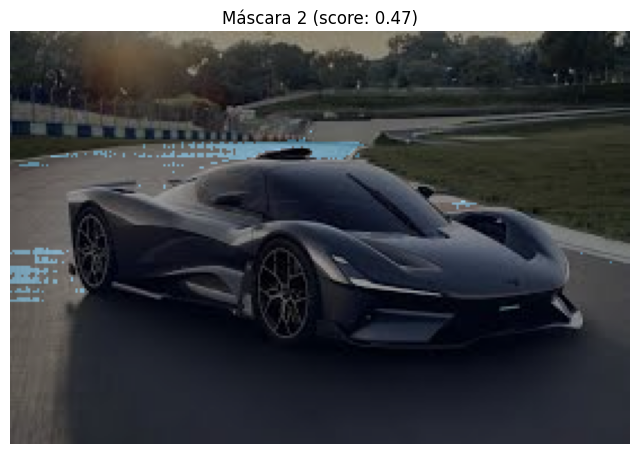

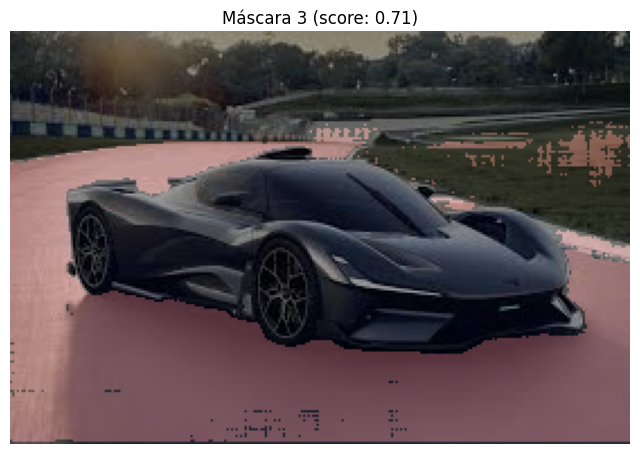

¡Máscaras guardadas en la carpeta 'resultados'!


In [10]:
import os
import matplotlib.pyplot as plt
os.makedirs("resultados", exist_ok=True)

# Visualizar y guardar cada máscara
for i, mask in enumerate(masks):
    # Mostrar máscara con color
    colored_mask = np.zeros_like(image)
    colored_mask[mask] = [np.random.randint(0, 255) for _ in range(3)]
    blended = cv2.addWeighted(image, 0.6, colored_mask, 0.4, 0)

    plt.figure(figsize=(8, 8))
    plt.imshow(blended)
    plt.axis("off")
    plt.title(f"Máscara {i+1} (score: {scores[i]:.2f})")
    plt.show()

    # Guardar máscara como imagen binaria (blanco y negro)
    bin_mask = (mask * 255).astype(np.uint8)
    Image.fromarray(bin_mask).save(f"resultados/mask_{i+1}.png")

    # Guardar como numpy array
    np.save(f"resultados/mask_{i+1}.npy", mask)

print("¡Máscaras guardadas en la carpeta 'resultados'!")

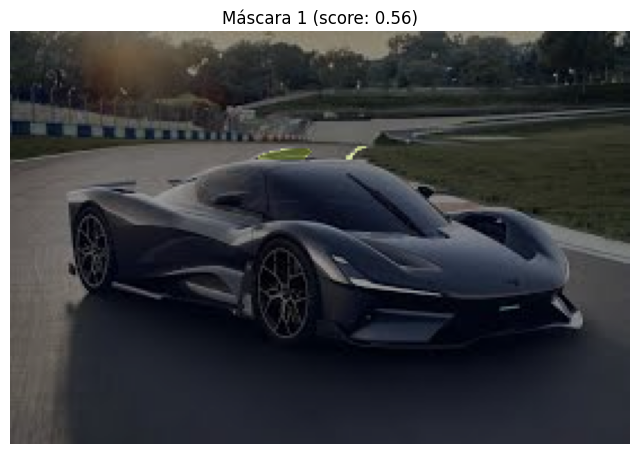

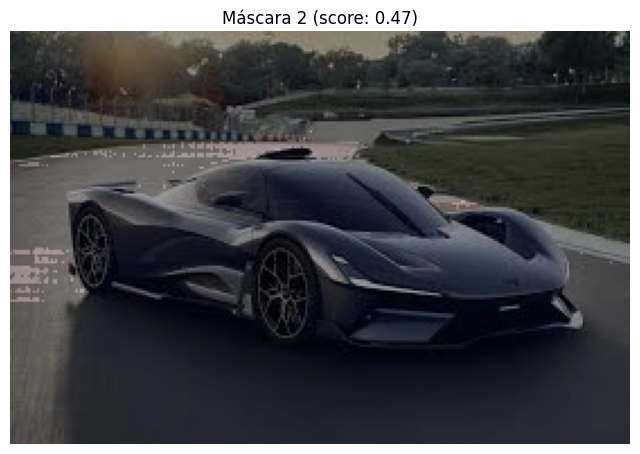

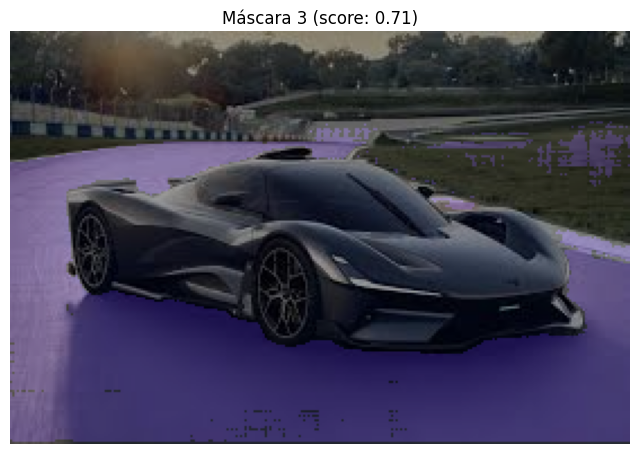

¡Máscaras y GIF guardados en la carpeta 'resultados'!


In [11]:
os.makedirs("resultados", exist_ok=True)

# Lista para las imágenes del GIF
gif_frames = []

# Visualizar y guardar cada máscara
for i, mask in enumerate(masks):
    # Crear máscara coloreada
    colored_mask = np.zeros_like(image)
    colored_mask[mask] = [np.random.randint(0, 255) for _ in range(3)]
    blended = cv2.addWeighted(image, 0.6, colored_mask, 0.4, 0)

    # Mostrar
    plt.figure(figsize=(8, 8))
    plt.imshow(blended)
    plt.axis("off")
    plt.title(f"Máscara {i+1} (score: {scores[i]:.2f})")
    plt.show()

    # Guardar imagen binaria
    bin_mask = (mask * 255).astype(np.uint8)
    Image.fromarray(bin_mask).save(f"resultados/mask_{i+1}.png")

    # Guardar array numpy
    np.save(f"resultados/mask_{i+1}.npy", mask)

    # Agregar al GIF (convertir a PIL Image)
    frame_pil = Image.fromarray(blended)
    gif_frames.append(frame_pil)

# Guardar GIF
gif_frames[0].save(
    "resultados/masks_animation.gif",
    save_all=True,
    append_images=gif_frames[1:],
    duration=800,   # duración de cada frame en ms
    loop=0
)

print("¡Máscaras y GIF guardados en la carpeta 'resultados'!")